In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("dataset/house.csv")
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [4]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [6]:
df.isna().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [7]:
df.corr()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
bedroom_count,1.000000,0.753441,-0.014428,0.022111,-0.534736,-0.056951,0.552405
net_sqm,0.753441,1.000000,-0.008848,0.031006,-0.409225,-0.050120,0.681987
center_distance,-0.014428,-0.008848,1.000000,0.581200,0.022840,0.011684,-0.418161
metro_distance,0.022111,0.031006,0.581200,1.000000,0.003137,0.011848,-0.146373
floor,-0.534736,-0.409225,0.022840,0.003137,1.000000,0.022045,-0.136713
age,-0.056951,-0.050120,0.011684,0.011848,0.022045,1.000000,-0.225119
price,0.552405,0.681987,-0.418161,-0.146373,-0.136713,-0.225119,1.000000


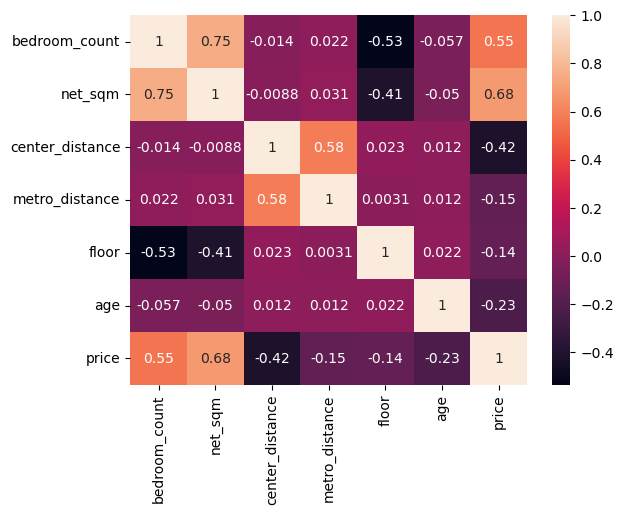

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()

# **Satu Fitur**

In [9]:
X = df[['bedroom_count']]
X

,bedroom_count
0,1
1,1
2,1
3,1
4,1
...,...
4303,9
4304,6
4305,5
4306,1


In [10]:
y = df["price"]
y

0        96004.804557
1        92473.722568
2        98112.519942
3        92118.326874
4        98976.653176
            ...      
4303    102707.356224
4304     99695.064992
4305     93803.715617
4306     92914.729126
4307     93743.047292
Name: price, Length: 4308, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluasi_model(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  return mae, mse, rmse, r2

mae, mse, rmse, r2 = evaluasi_model(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 2603.8948964552956
MSE: 10465748.213103835
RMSE: 3235.080866547826
R^2: 0.2967492535231473


# **Multi Fitur**

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [16]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

X, y

(      bedroom_count     net_sqm  center_distance  metro_distance  floor  age
 0                 1   26.184098          1286.68      204.003817     22   67
 1                 1   34.866901          1855.25      186.980360      8   30
 2                 1   36.980709           692.09      111.224999     24   24
 3                 1   17.445723          1399.49      237.998760      1   66
 4                 1   52.587646            84.65      100.996400     20    3
 ...             ...         ...              ...             ...    ...  ...
 4303              9  175.166533          1299.71      217.739012      2    5
 4304              6  215.352151          1346.36       77.724676     14    5
 4305              5  299.563972          1585.37      235.537881      3    5
 4306              1   29.193907          1896.23      147.223827      4    2
 4307              2   54.437573           255.24       25.524020     18    0
 
 [4308 rows x 6 columns],
 0        96004.804557
 1        924

In [17]:
X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scale

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,0.0000,0.021519,0.641275,0.616231,0.913043,0.690722
1,0.0000,0.033241,0.927270,0.564493,0.304348,0.309278
2,0.0000,0.036095,0.342191,0.334254,1.000000,0.247423
3,0.0000,0.009722,0.698019,0.719550,0.000000,0.680412
4,0.0000,0.057164,0.036644,0.303167,0.826087,0.030928
...,...,...,...,...,...,...
4303,0.5000,0.222649,0.647829,0.657976,0.043478,0.051546
4304,0.3125,0.276900,0.671294,0.232439,0.565217,0.051546
4305,0.2500,0.390588,0.791518,0.712071,0.086957,0.051546
4306,0.0000,0.025582,0.947883,0.443663,0.130435,0.020619


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, shuffle=True)

In [19]:
model2 = LinearRegression()

In [20]:
model2.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model2.predict(X_test)

In [22]:
mae, mse, rmse, r2 = evaluasi_model(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 1482.3528087565555
MSE: 4028777.98526263
RMSE: 2007.1816024621762
R^2: 0.729284417335968
